## EDA - Health App Data

In [5]:
import pandas as pd

In [8]:
df = pd.read_csv('/Users/swanandmarathe/Downloads/health_dataset_1.csv')

In [9]:
df.head()

,user_id,name,gender,country,phone_no,email_id,date_subscribed,no_newsletters_sent,app_installed,date_app_installed,...,conversion_stage,conversion,campaign_platform,source,blog_title,lead_source,CPC,plan_opted,plan_duration,price
0,2824,Donald Walker,Male,Saint Pierre and Miquelon,581-296-0013,donald.walker@gmail.com,2023-07-24,1,Yes,2023-08-28,...,NaN,NaN,Meta Ads,Social,Nutrition,Google Ads,1.80,NaN,NaN,NaN
1,9928,Jerry Ramirez,Male,Trinidad and Tobago,3268542351,jerry.ramirez@gmail.com,2023-02-05,2,Yes,2023-03-20,...,NaN,NaN,Google Ads,Email,Nutrition,Meta Ads,1.74,NaN,NaN,NaN
2,6635,Renee Blair,Female,Mauritania,361-284-9593,renee.blair@gmail.com,2023-08-29,5,No,NaN,...,NaN,NaN,Email,Direct,Yoga,NaN,NaN,NaN,NaN,NaN
3,5741,Dr. Sharon James,Unknown,Korea,+1-952-855-3419x2832,dr..sharon.james@gmail.com,2023-04-09,2,Yes,2023-04-19,...,NaN,NaN,Meta Ads,Organic Search,Yoga,NaN,NaN,NaN,NaN,NaN
4,4598,Sarah Parsons,Female,Denmark,9568413953,sarah.parsons@gmail.com,2023-11-19,2,Yes,2023-12-20,...,NaN,NaN,Meta Ads,Direct,Yoga,NaN,NaN,NaN,NaN,NaN


In [12]:
df.shape

(4320, 33)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4320 entries, 0 to 4319
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              4320 non-null   int64  
 1   name                 4320 non-null   object 
 2   gender               4320 non-null   object 
 3   country              4320 non-null   object 
 4   phone_no             4320 non-null   object 
 5   email_id             4320 non-null   object 
 6   date_subscribed      4320 non-null   object 
 7   no_newsletters_sent  4320 non-null   int64  
 8   app_installed        4320 non-null   object 
 9   date_app_installed   3593 non-null   object 
 10  age                  3593 non-null   float64
 11  weight               3593 non-null   float64
 12  height               3593 non-null   float64
 13  workout_in_week      3593 non-null   float64
 14  meditation_in_week   3593 non-null   float64
 15  diabetic             3593 non-null   o

In [17]:
df['workout_in_week'] = df['workout_in_week'].astype(object)
df['meditation_in_week'] = df['meditation_in_week'].astype(object)
df['date_subscribed'] = pd.to_datetime(df['date_subscribed'])
df['date_app_installed'] = pd.to_datetime(df['date_app_installed'])
df['date_lead_generated'] = pd.to_datetime(df['date_lead_generated'])
df['conversion_stage'] = pd.to_datetime(df['conversion_stage'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4320 entries, 0 to 4319
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              4320 non-null   int64         
 1   name                 4320 non-null   object        
 2   gender               4320 non-null   object        
 3   country              4320 non-null   object        
 4   phone_no             4320 non-null   object        
 5   email_id             4320 non-null   object        
 6   date_subscribed      4320 non-null   datetime64[ns]
 7   no_newsletters_sent  4320 non-null   int64         
 8   app_installed        4320 non-null   object        
 9   date_app_installed   3593 non-null   datetime64[ns]
 10  age                  3593 non-null   float64       
 11  weight               3593 non-null   float64       
 12  height               3593 non-null   float64       
 13  workout_in_week      3593 non-nul

## Exploratory Data Analysis

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

### Univariate Analysis

#### Lets first have a look at continuous variables and its distribution.

In [20]:
continuous_vars = ['age', 'height', 'weight', 'CPC']

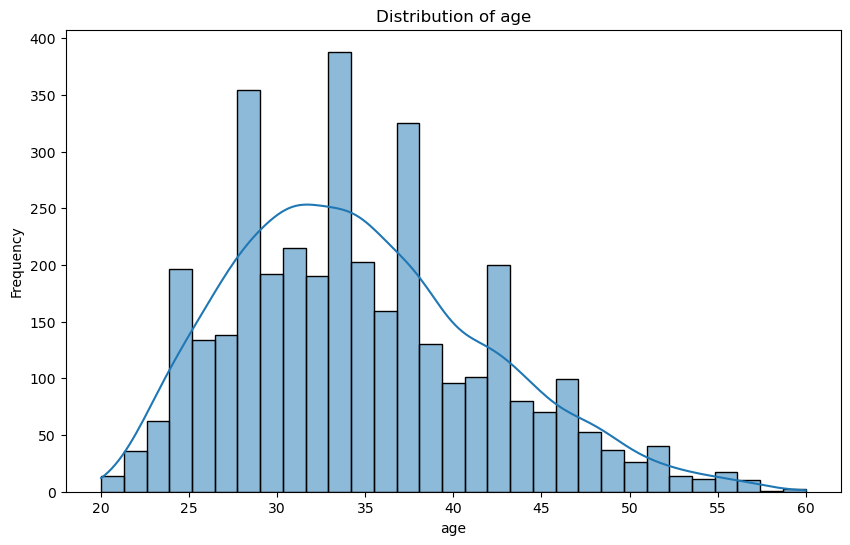

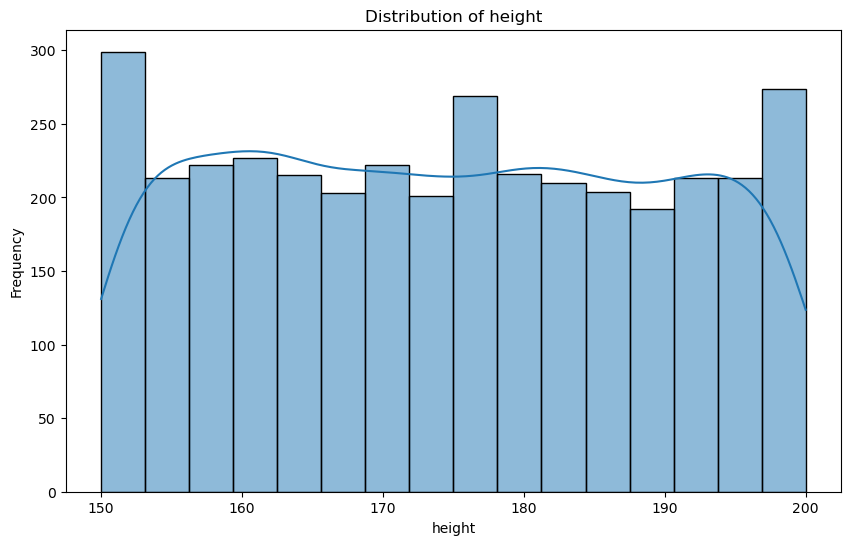

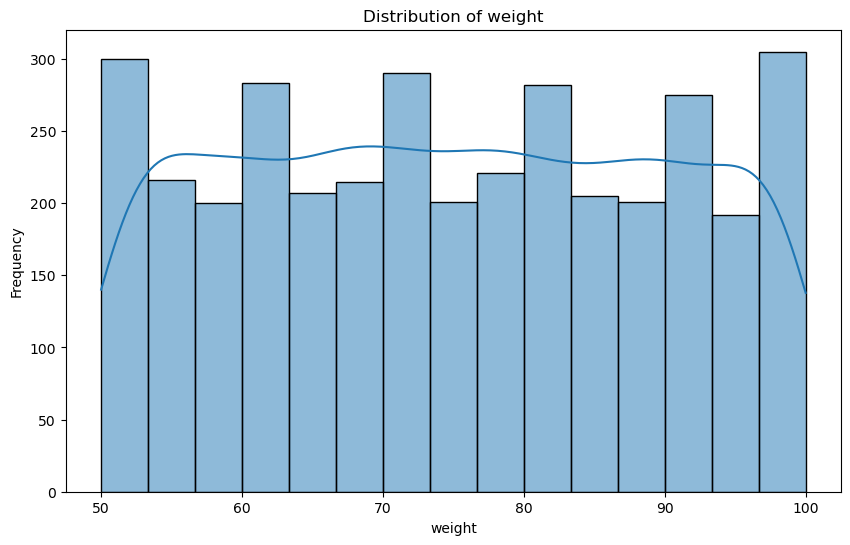

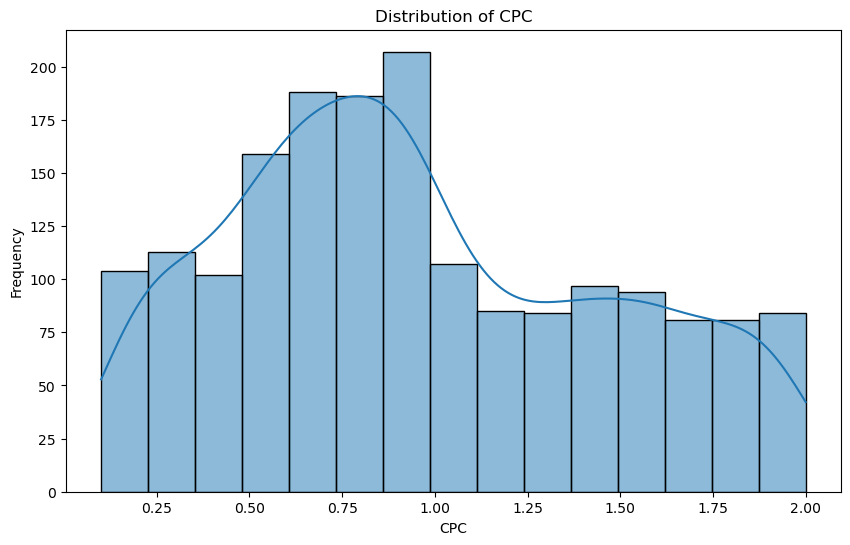

In [21]:
for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[var], kde=True) 
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

#### Now, Lets have a look at distribution of Categorical variables.

In [25]:
categorical_vars = df.select_dtypes(include=['object', 'category']).columns
exclude_columns = ['email_id', 'country', 'name', 'phone_no', 'date_followup_1', 'date_followup_2']
categorical_vars = categorical_vars.drop(exclude_columns)
print(categorical_vars)

Index(['gender', 'app_installed', 'workout_in_week', 'meditation_in_week',
       'diabetic', 'blood_pressure', 'vitamins', 'active_disease',
       'care_wellbeing', 'conversion', 'campaign_platform', 'source',
       'blog_title', 'lead_source', 'plan_opted', 'plan_duration'],
      dtype='object')


In [26]:
for var in categorical_vars:
    print(df[var].value_counts())

Male       2119
Female     2114
Unknown      87
Name: gender, dtype: int64
Yes    3593
No      727
Name: app_installed, dtype: int64
1.0    488
5.0    462
7.0    455
2.0    452
3.0    446
6.0    435
4.0    433
0.0    422
Name: workout_in_week, dtype: int64
2.0    468
6.0    465
3.0    463
1.0    458
4.0    445
0.0    439
7.0    434
5.0    421
Name: meditation_in_week, dtype: int64
No     2957
Yes     636
Name: diabetic, dtype: int64
No     2961
Yes     632
Name: blood_pressure, dtype: int64
No     1806
Yes    1787
Name: vitamins, dtype: int64
None                   1834
Other                   522
Heart Problem           374
Respiratory Problem     347
Alzheimer's Disease     176
Cancer                  174
Tuberculosis            166
Name: active_disease, dtype: int64
Well-being    1834
Care          1759
Name: care_wellbeing, dtype: int64
True    231
Name: conversion, dtype: int64
Email         1744
Google Ads    1277
Meta Ads       901
Message        398
Name: campaign_platform, dty

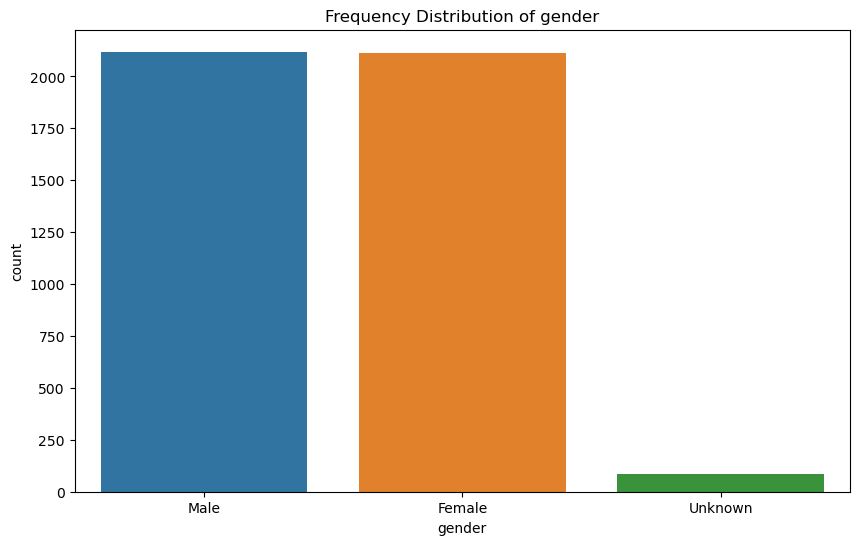

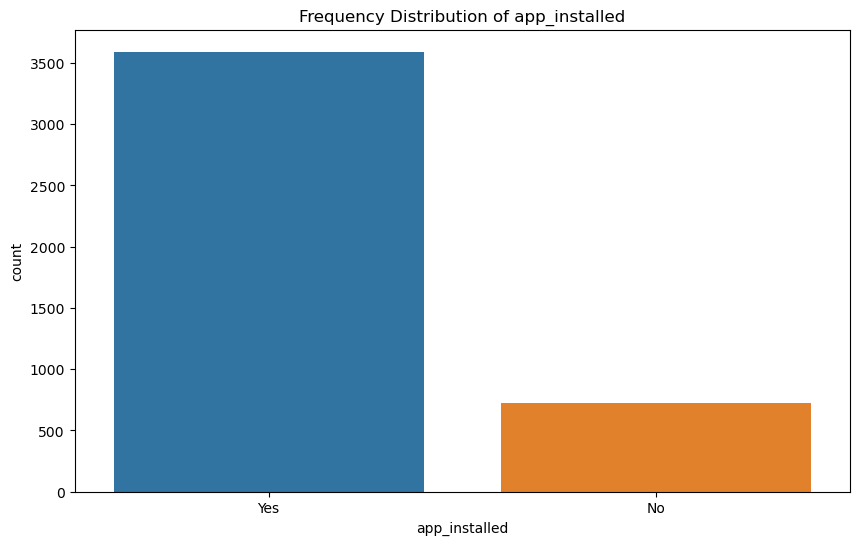

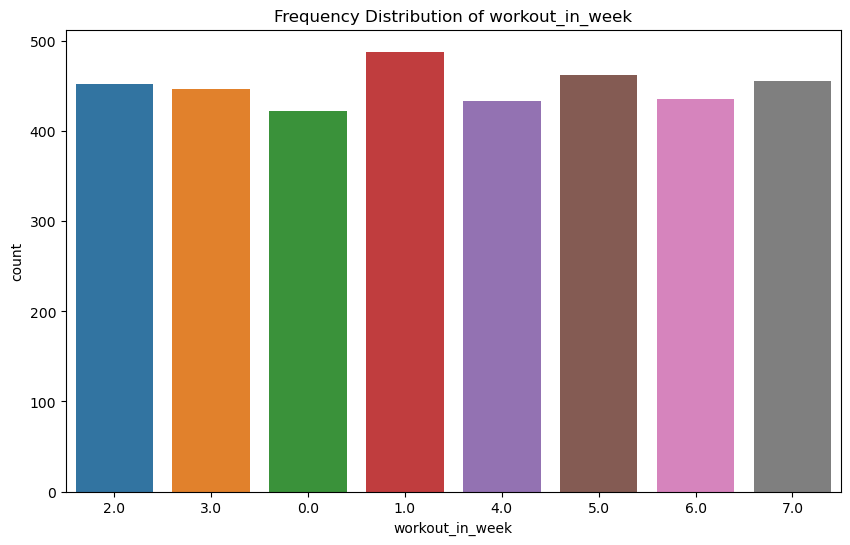

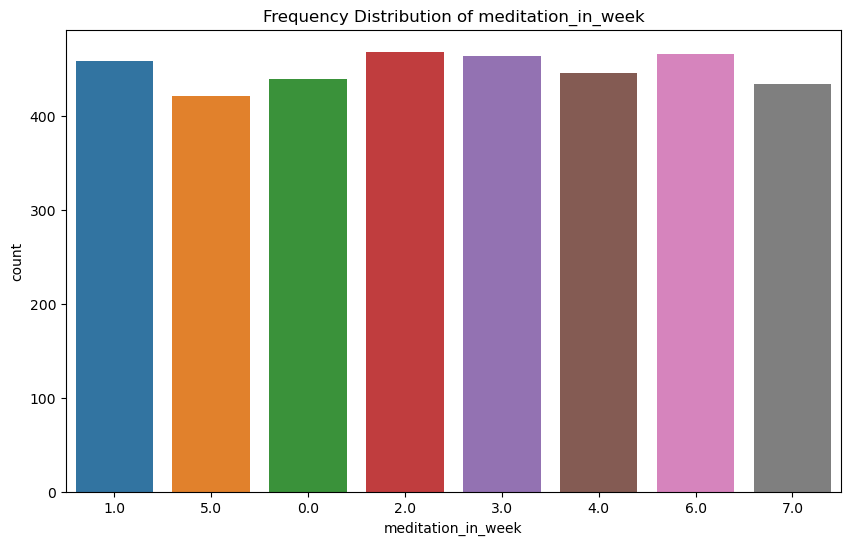

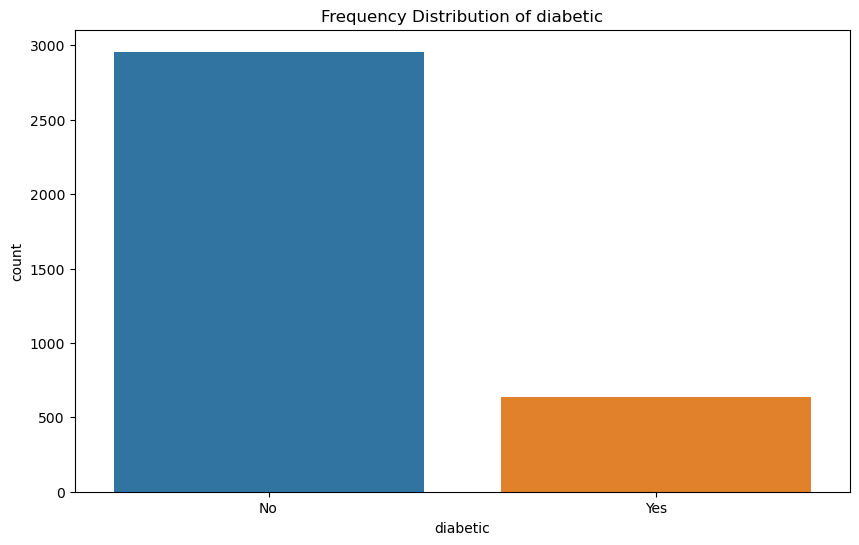

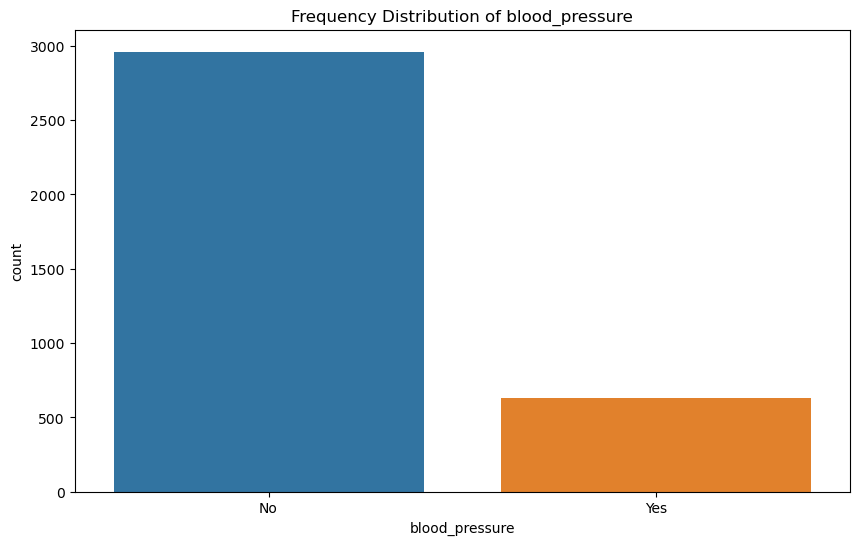

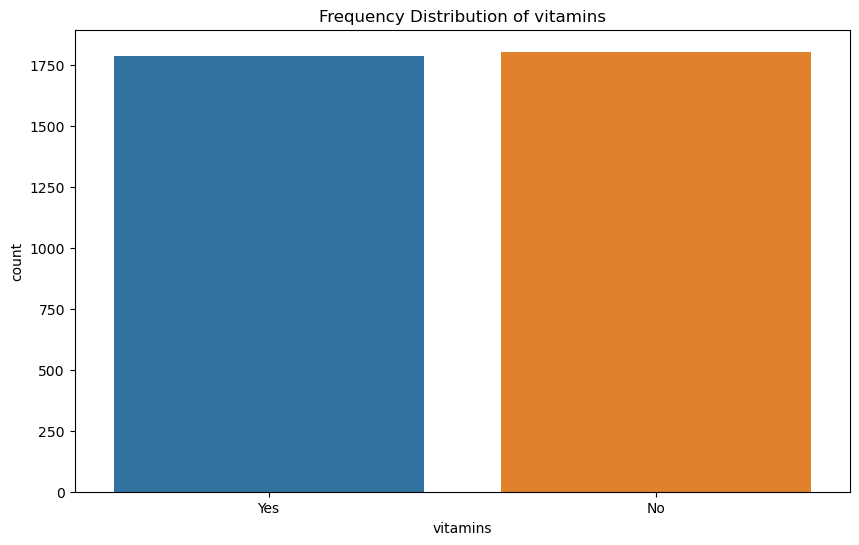

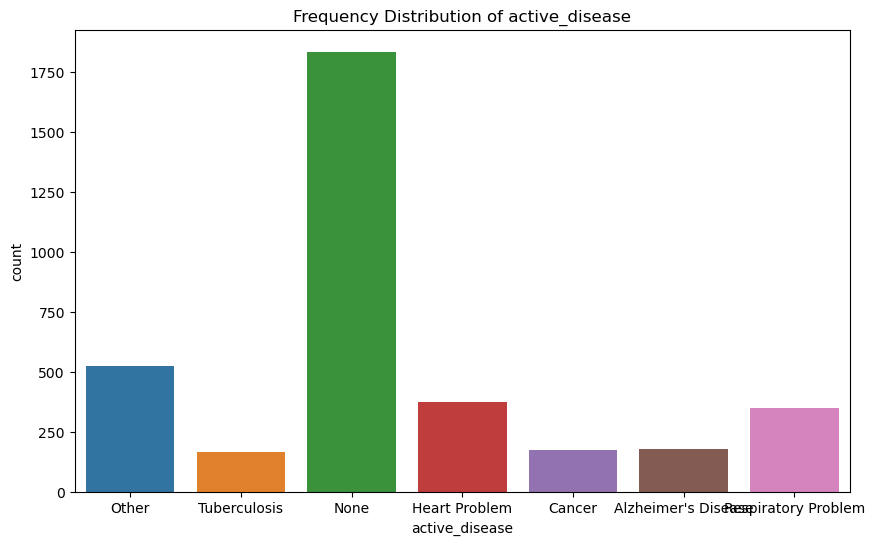

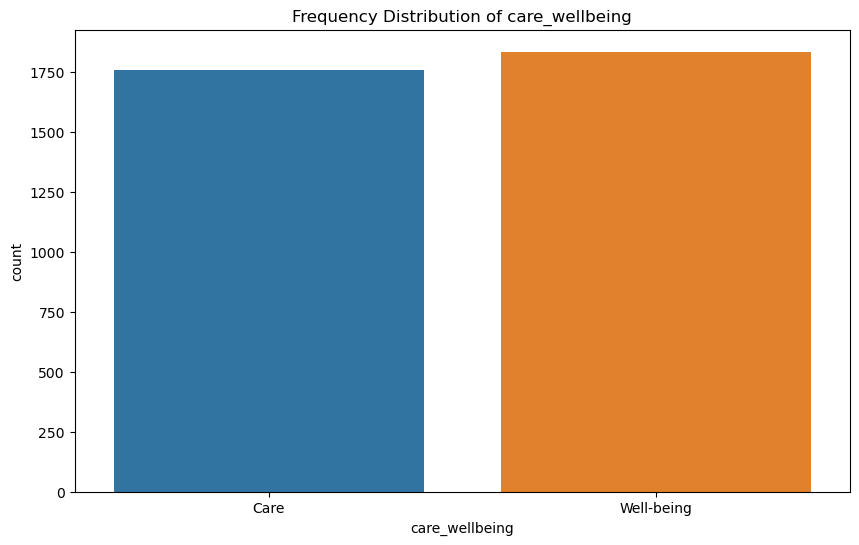

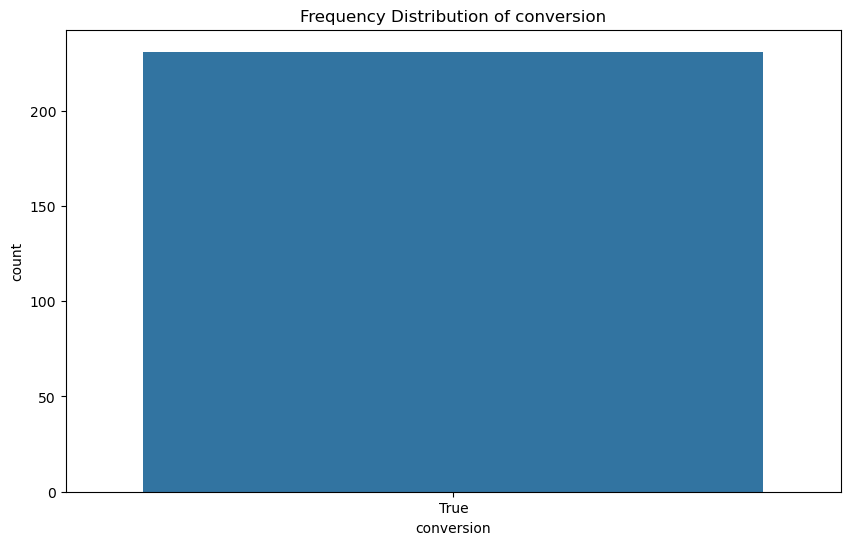

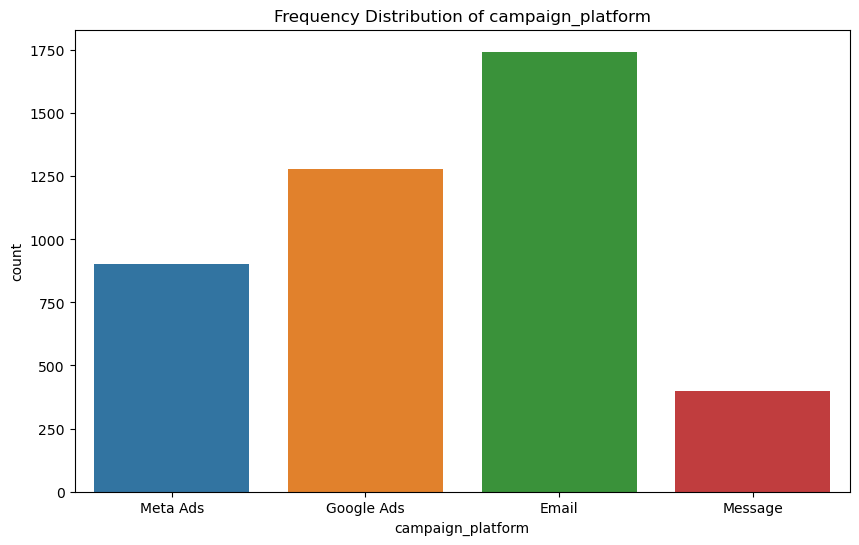

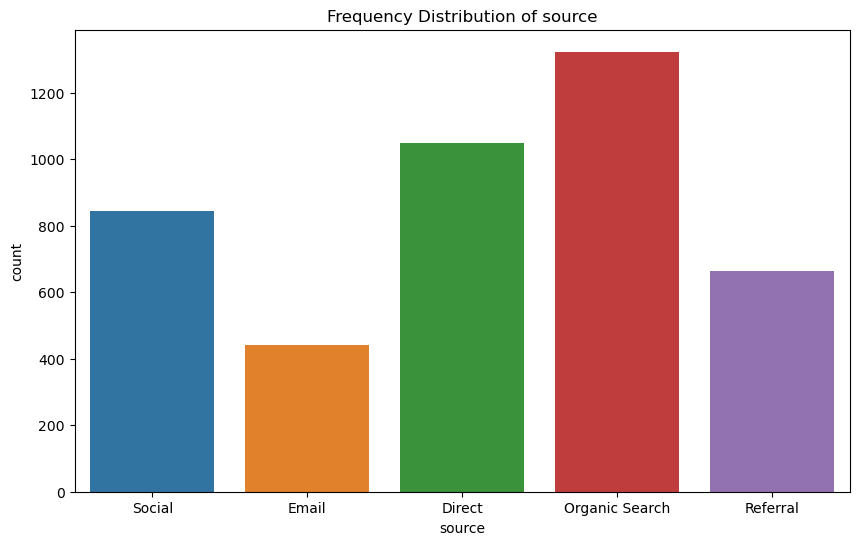

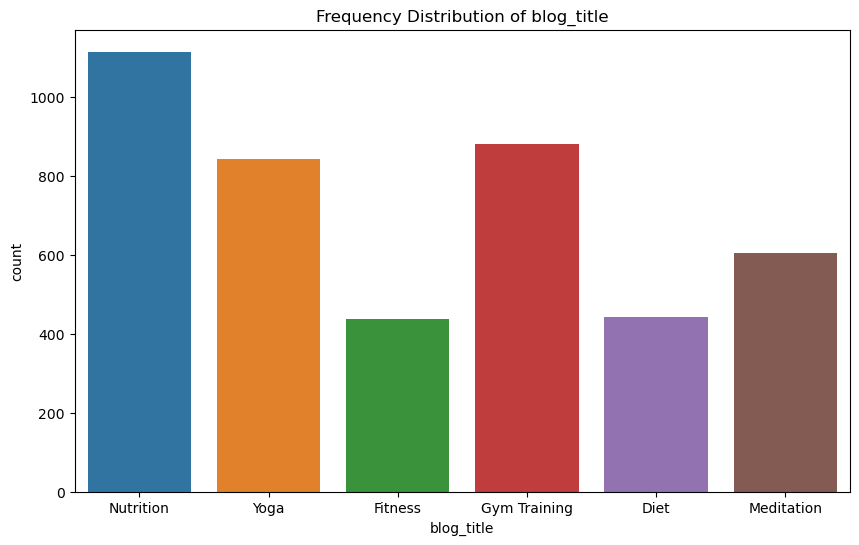

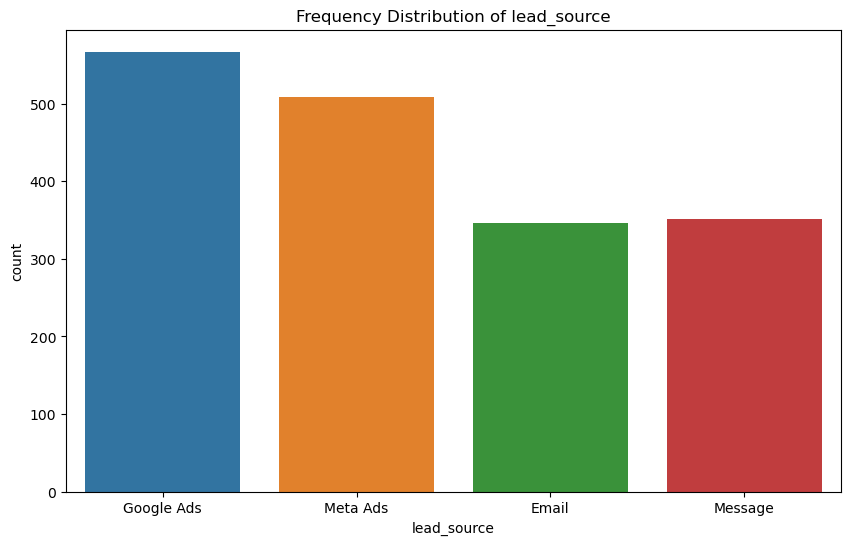

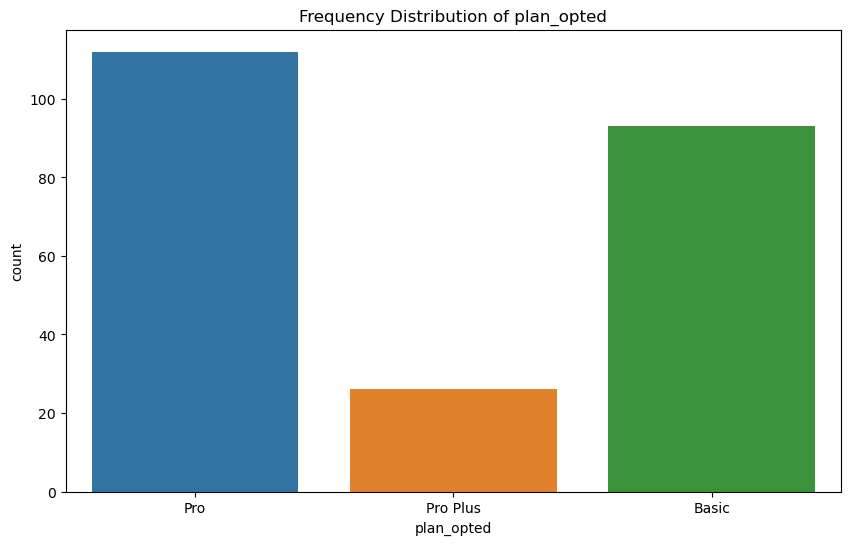

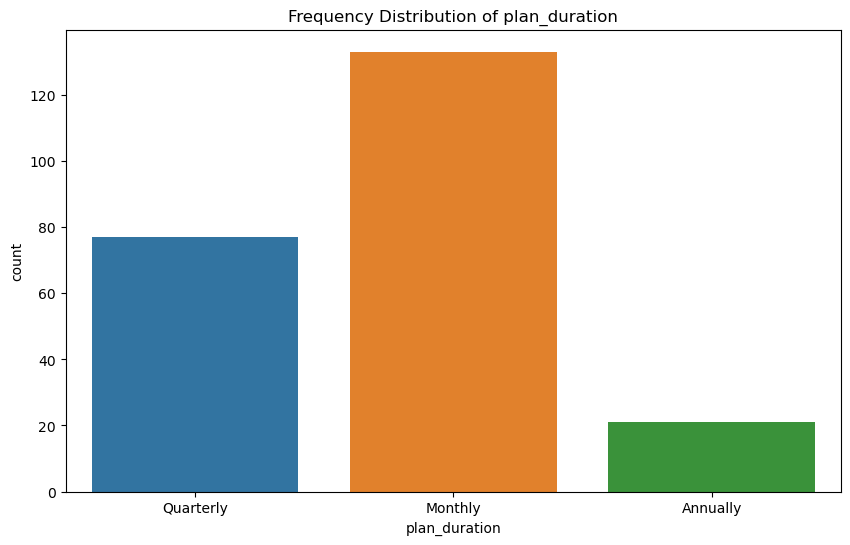

In [27]:
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=var, data=df)
    plt.title(f'Frequency Distribution of {var}')
    plt.show()

### Bivariate Analysis

#### Let's have a look at relationship between continuous variables.

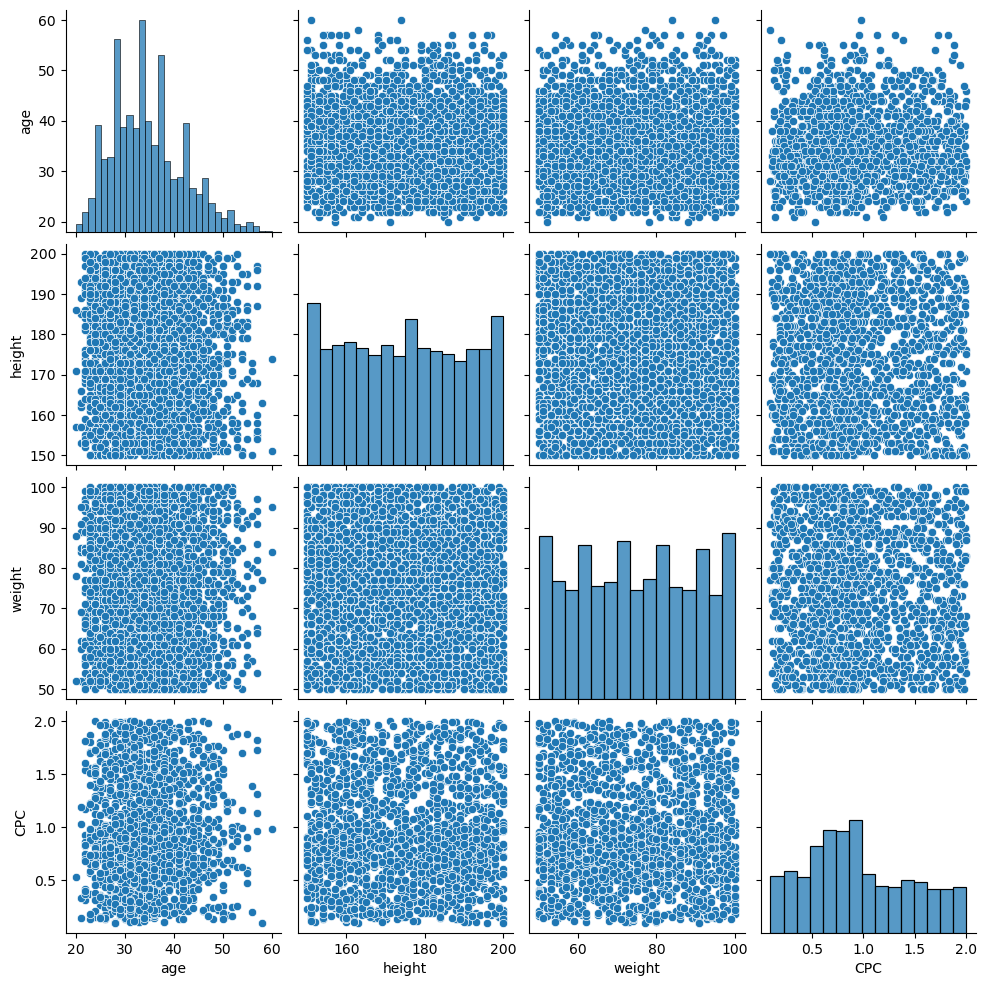

In [28]:
sns.pairplot(df[continuous_vars])
plt.show()

#### Over here, We can clearly observe that there is no corelation among the continuous variables.

#### Now, Bivariate analysis for categorical variables using chi-square test.

In [30]:
from scipy.stats import chi2_contingency
from itertools import combinations
import pandas as pd


categorical_vars = [
    'gender', 'app_installed', 'workout_in_week', 'meditation_in_week',
    'diabetic', 'blood_pressure', 'vitamins', 'active_disease',
    'care_wellbeing', 'conversion', 'campaign_platform', 'source',
    'blog_title', 'lead_source', 'plan_opted', 'plan_duration'
]


chi_square_results = []


for var1, var2 in combinations(categorical_vars, 2):
     
        contingency_table = pd.crosstab(df[var1], df[var2])
    
    
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
   
    chi_square_results.append({
        'Variable 1': var1,
        'Variable 2': var2,
        'Chi-square Statistic': chi2,
        'p-value': p,
        'Degrees of Freedom': dof
    })


results_df = pd.DataFrame(chi_square_results)


print(results_df)

      Variable 1          Variable 2  Chi-square Statistic   p-value  \
0         gender       app_installed              0.744606  0.689145   
1         gender     workout_in_week              9.279062  0.812769   
2         gender  meditation_in_week             13.513901  0.486517   
3         gender            diabetic              0.107122  0.947848   
4         gender      blood_pressure              3.109049  0.211290   
..           ...                 ...                   ...       ...   
115   blog_title          plan_opted             19.707426  0.032145   
116   blog_title       plan_duration              8.004653  0.628382   
117  lead_source          plan_opted              6.635690  0.355855   
118  lead_source       plan_duration              0.581389  0.996703   
119   plan_opted       plan_duration              5.187630  0.268582   

     Degrees of Freedom  
0                     2  
1                    14  
2                    14  
3                     2  
4    

#### Over here, All the p-values are well above 0.05. Hence we can conclude there is no significant corelation among them.

## Cluster Analysis

#### To perform clster analysis, Lets just consider app_form data as it has all the characteristics of users. 

In [33]:
df2 = pd.read_csv('/Users/swanandmarathe/Desktop/health_app_project_Datasets/health_app_data - app_form.csv')

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             3650 non-null   int64 
 1   age                 3650 non-null   int64 
 2   weight              3650 non-null   int64 
 3   height              3650 non-null   int64 
 4   workout_in_week     3650 non-null   int64 
 5   meditation_in_week  3650 non-null   int64 
 6   diabetic            3650 non-null   object
 7   blood_pressure      3650 non-null   object
 8   vitamins            3650 non-null   object
 9   active_disease      3650 non-null   object
 10  care_wellbeing      3650 non-null   object
dtypes: int64(6), object(5)
memory usage: 313.8+ KB


In [35]:
df2.isnull().sum()

user_id               0
age                   0
weight                0
height                0
workout_in_week       0
meditation_in_week    0
diabetic              0
blood_pressure        0
vitamins              0
active_disease        0
care_wellbeing        0
dtype: int64

In [51]:
categorical_vars = [
    'workout_in_week', 'meditation_in_week',
    'diabetic', 'blood_pressure', 'vitamins', 'active_disease',
    'care_wellbeing'
]
continuous_vars = ['age', 'height', 'weight']

In [52]:
df2 = pd.get_dummies(df2, columns=categorical_vars, drop_first=True)

KeyError: "None of [Index(['workout_in_week', 'meditation_in_week', 'diabetic', 'blood_pressure',\n       'vitamins', 'active_disease', 'care_wellbeing'],\n      dtype='object')] are in the [columns]"

In [39]:
df2.head()

,user_id,age,weight,height,workout_in_week_1,workout_in_week_2,workout_in_week_3,workout_in_week_4,workout_in_week_5,workout_in_week_6,...,diabetic_Yes,blood_pressure_Yes,vitamins_Yes,active_disease_Cancer,active_disease_Heart Problem,active_disease_None,active_disease_Other,active_disease_Respiratory Problem,active_disease_Tuberculosis,care_wellbeing_Well-being
0,2824,35,65,164,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,9928,25,87,167,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,6635,42,96,179,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
3,5741,47,68,155,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4598,35,84,196,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df2[continuous_vars] = scaler.fit_transform(df2[continuous_vars])

In [41]:
df2.head()

,user_id,age,weight,height,workout_in_week_1,workout_in_week_2,workout_in_week_3,workout_in_week_4,workout_in_week_5,workout_in_week_6,...,diabetic_Yes,blood_pressure_Yes,vitamins_Yes,active_disease_Cancer,active_disease_Heart Problem,active_disease_None,active_disease_Other,active_disease_Respiratory Problem,active_disease_Tuberculosis,care_wellbeing_Well-being
0,2824,0.098707,-0.698557,-0.773342,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,9928,-1.335532,0.804702,-0.569782,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,6635,1.102675,1.419672,0.244458,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
3,5741,1.819794,-0.493567,-1.384022,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4598,0.098707,0.599712,1.397965,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


/Users/swanandmarathe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/swanandmarathe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/swanandmarathe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/swanandmarathe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

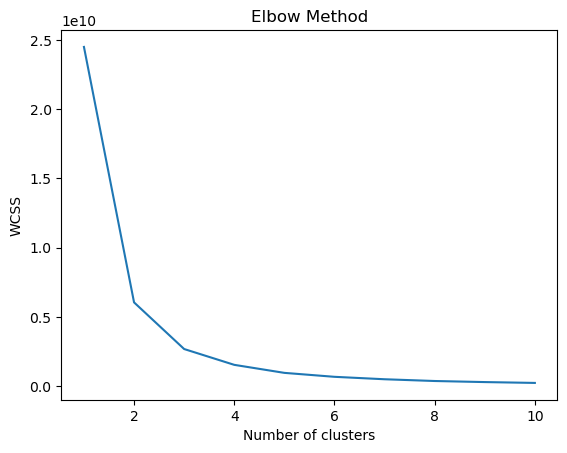

In [43]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [46]:
k = 3  
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
df2['Cluster'] = kmeans.fit_predict(df2)

/Users/swanandmarathe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [48]:
df2.head()

,user_id,age,weight,height,workout_in_week_1,workout_in_week_2,workout_in_week_3,workout_in_week_4,workout_in_week_5,workout_in_week_6,...,blood_pressure_Yes,vitamins_Yes,active_disease_Cancer,active_disease_Heart Problem,active_disease_None,active_disease_Other,active_disease_Respiratory Problem,active_disease_Tuberculosis,care_wellbeing_Well-being,Cluster
0,2824,0.098707,-0.698557,-0.773342,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,9928,-1.335532,0.804702,-0.569782,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,6635,1.102675,1.419672,0.244458,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,2
3,5741,1.819794,-0.493567,-1.384022,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,2
4,4598,0.098707,0.599712,1.397965,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,2


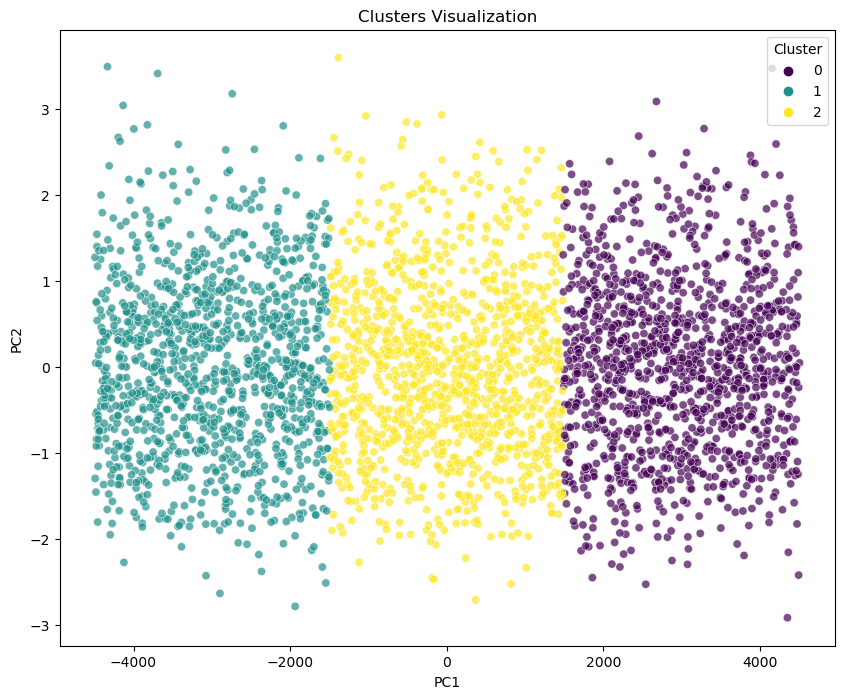

In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df2.drop('Cluster', axis=1))
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['Cluster'] = df2['Cluster']

# Plotting
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=principal_df, palette='viridis', alpha=0.7)
plt.title('Clusters Visualization')
plt.show()

In [50]:
for i in range(k):
    print(f"Cluster {i} characteristics:")
    cluster_data = df2[df2['Cluster'] == i]
    print(cluster_data.describe(include='all'))


Cluster 0 characteristics:
           user_id          age       weight       height  workout_in_week_1  \
count  1236.000000  1236.000000  1236.000000  1236.000000        1236.000000   
mean   8449.326052    -0.036826     0.015978     0.034310           0.130259   
std     850.447705     1.001969     1.002875     1.004118           0.336724   
min    6979.000000    -1.909228    -1.723506    -1.723289           0.000000   
25%    7728.000000    -0.761837    -0.835217    -0.841195           0.000000   
50%    8427.000000    -0.188141    -0.015257     0.108751           0.000000   
75%    9179.250000     0.528979     0.873032     0.922991           0.000000   
max    9997.000000     3.540882     1.692991     1.669378           1.000000   

       workout_in_week_2  workout_in_week_3  workout_in_week_4  \
count        1236.000000        1236.000000        1236.000000   
mean            0.134304           0.110032           0.136731   
std             0.341117           0.313057           